In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#read data
dataframe = pd.read_csv('Reviews.csv')

#get top rows of data
dataframe.head(4)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...


In [ ]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

#lowercase
dataframe['Text'] = dataframe['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
#remove url
dataframe['Text'] = dataframe['Text'].str.replace('((www\.[^\s]+)|(https?://[^\s]+)|(hrefhttp?://[^\s]+))','URL')
#remove punctuations
dataframe['Text'] = dataframe['Text'].str.replace('[^\w\s]', '')
#remove url (again)
dataframe['Text'] = dataframe['Text'].str.replace('href\s+\ ','URL ')

dataframe.head(4)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,i have bought several of the vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labeled as jumbo salted peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",this is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,if you are looking for the secret ingredient i...


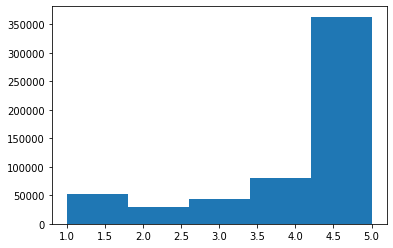

In [ ]:
reviews = dataframe

#dropping null values
reviews.dropna(inplace=True)

reviews.Score.hist(bins=5, grid=False)
plt.show()

In [ ]:
print (reviews.groupby('Score').count().Id)

Score
1     52264
2     29743
3     42638
4     80655
5    363111
Name: Id, dtype: int64


In [ ]:
!pip install stopwords
!pip install nltk

In [ ]:
#removing stop words
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
dataframe['Text'] = dataframe['Text'].apply(lambda x: " ".join(x.lower() for x in x.split() if x not in stop))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
score_1 = reviews[reviews['Score'] == 1].sample(n=29743)
score_2 = reviews[reviews['Score'] == 2].sample(n=29743)
score_3 = reviews[reviews['Score'] == 3].sample(n=29743)
score_4 = reviews[reviews['Score'] == 4].sample(n=29743)
score_5 = reviews[reviews['Score'] == 5].sample(n=29743)

#recreate a 'balanced' dataset.
reviews_sample = pd.concat([score_1, score_2, score_3, score_4, score_5], axis=0)
reviews_sample.reset_index(drop=True, inplace=True)

print(reviews_sample.groupby('Score').count().Id)

Score
1    29743
2    29743
3    29743
4    29743
5    29743
Name: Id, dtype: int64


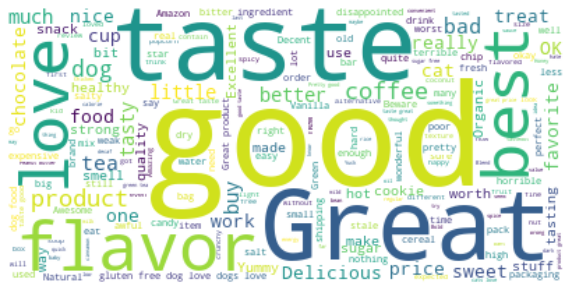

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

#record summaries
reviews_str = reviews_sample.Summary.str.cat()

wordcloud = WordCloud(background_color = 'white').generate(reviews_str)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

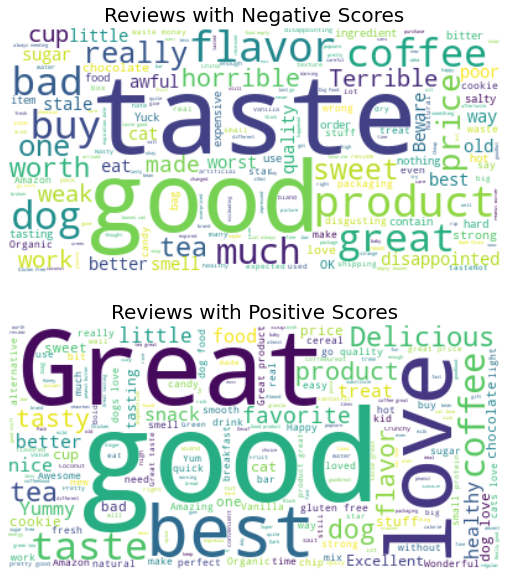

In [ ]:
#split data into negative and positive score
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2])]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5])]

#concat into single string
negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

#create wordcloud
wc_negative = WordCloud(background_color = 'white').generate(negative_reviews_str)
wc_positive = WordCloud(background_color = 'white').generate(positive_reviews_str)

#plotting
fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot(211)
ax1.imshow(wc_negative, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Reviews with Negative Scores', fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wc_positive, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Reviews with Positive Scores', fontsize=20)

plt.show()

In [ ]:
#CountVectorizer

from sklearn.feature_extraction.text import CountVectorizer

# i just make 600 data sample
temp_reviews = reviews_sample['Text'][:600]

#create transform
vectorizer = CountVectorizer()

#tokenizing
vectorizer.fit(temp_reviews)

#encode document
vectorizer_vector = vectorizer.transform(temp_reviews)

#summarize and generate output
print(vectorizer.vocabulary_)
print(vectorizer_vector.toarray())

{'excited': 1899, 'hear': 2504, 'bringing': 772, 'sweet': 5093, 'strawberry': 4994, 'flavored': 2075, 'licorice': 3047, 'roll': 4421, 'backonly': 521, 'order': 3649, 'two': 5446, 'boxes': 735, 'could': 1313, 'tell': 5184, 'minute': 3334, 'opened': 3636, 'wrapper': 5802, 'smelled': 4766, 'werent': 5708, 'even': 1866, 'close': 1105, 'ever': 1870, 'happened': 2464, 'original': 3663, 'taste': 5154, 'growing': 2415, 'tastes': 5159, 'waxy': 5674, 'syntheticso': 5117, 'bummed': 804, 'hoping': 2594, 'natural': 3452, 'tasting': 5161, 'snack': 4777, 'chose': 1062, 'buy': 827, 'thisbr': 5261, 'br': 743, 'disgustingbr': 1606, 'okay': 3612, 'really': 4199, 'ruins': 4448, 'product': 4052, 'texture': 5210, 'flavor': 2073, 'apple': 406, 'loaded': 3104, 'sugar': 5045, 'sugary': 5049, 'fruit': 2203, 'foot': 2129, 'wonderfully': 5764, 'bought': 727, '30pack': 126, 'class': 1089, 'action': 235, 'law': 2985, 'firm': 2058, 'gallo': 2238, 'associates': 463, 'investigating': 2807, 'whether': 5721, 'sunmaid': 

In [ ]:
#Co-occurence Matrix

import numpy as np
import nltk
from nltk import bigrams
import itertools

def co_occurence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_to_index = { word: i for i, word in enumerate(vocab)}
    
    #create bigrams for all words in corpus
    bi_grams = list(bigrams(corpus))
    
    #frequency distribution of bigram ((word1, word2), num_occurences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
    
    #initialize co-occurence matrix
    #co_occurence_matrix[current][previous]
    
    co_occur_matrix = np.zeros((len(vocab), len(vocab)))
    
    #loop thru the bigrams taking the current and previous word,
    #and the number of occurences of the bigram
    
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_to_index[current]
        pos_previous = vocab_to_index[previous]
        co_occur_matrix[pos_current][pos_previous] = count
    
    co_occur_matrix = np.matrix(co_occur_matrix)
    
    return co_occur_matrix, vocab_to_index

#i just process 600 data sample
temp_reviews = [x.split() for x in reviews_sample['Text'][:600]]

merged = list(itertools.chain.from_iterable(temp_reviews))
co_matrix, v_to_idx = co_occurence_matrix(merged)
co_matrix_final = pd.DataFrame(co_matrix, index=v_to_idx, columns=v_to_idx)
print(co_matrix_final)

            jacks  toy  dry  yard  ...  sly  stockton  active  expertbeen
jacks         0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
toy           0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
dry           0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
yard          0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
palm          0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
...           ...  ...  ...   ...  ...  ...       ...     ...         ...
darken        0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
sly           0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
stockton      0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
active        0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0
expertbeen    0.0  0.0  0.0   0.0  ...  0.0       0.0     0.0         0.0

[5877 rows x 5877 columns]


In [ ]:
#N-grams

#i just process 600 data sample
import nltk
nltk.download('punkt')
temp_reviews = reviews_sample['Text'][:600]

from textblob import TextBlob

for review_txt in temp_reviews:
    #building a bi-gram
    print(TextBlob(review_txt).ngrams(2))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[WordList(['excited', 'hear']), WordList(['hear', 'bringing']), WordList(['bringing', 'sweet']), WordList(['sweet', 'strawberry']), WordList(['strawberry', 'flavored']), WordList(['flavored', 'licorice']), WordList(['licorice', 'roll']), WordList(['roll', 'backonly']), WordList(['backonly', 'order']), WordList(['order', 'two']), WordList(['two', 'boxes']), WordList(['boxes', 'could']), WordList(['could', 'tell']), WordList(['tell', 'minute']), WordList(['minute', 'opened']), WordList(['opened', 'wrapper']), WordList(['wrapper', 'smelled']), WordList(['smelled', 'werent']), WordList(['werent', 'even']), WordList(['even', 'close']), WordList(['close', 'ever']), WordList(['ever', 'happened']), WordList(['happened', 'sweet']), WordList(['sweet', 'original']), WordList(['original', 'licorice']), WordList(['licorice', 'taste']), WordList(['taste', 'growing']), WordList(['growing', 'licor

In [ ]:
#TF-IDF

#i just process 600 data sample
temp_reviews = reviews_sample['Text'][:600]

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

tfidf_vectorizer.fit(temp_reviews)

print(tfidf_vectorizer.vocabulary_)
print(tfidf_vectorizer.idf_)

{'excited': 1899, 'hear': 2504, 'bringing': 772, 'sweet': 5093, 'strawberry': 4994, 'flavored': 2075, 'licorice': 3047, 'roll': 4421, 'backonly': 521, 'order': 3649, 'two': 5446, 'boxes': 735, 'could': 1313, 'tell': 5184, 'minute': 3334, 'opened': 3636, 'wrapper': 5802, 'smelled': 4766, 'werent': 5708, 'even': 1866, 'close': 1105, 'ever': 1870, 'happened': 2464, 'original': 3663, 'taste': 5154, 'growing': 2415, 'tastes': 5159, 'waxy': 5674, 'syntheticso': 5117, 'bummed': 804, 'hoping': 2594, 'natural': 3452, 'tasting': 5161, 'snack': 4777, 'chose': 1062, 'buy': 827, 'thisbr': 5261, 'br': 743, 'disgustingbr': 1606, 'okay': 3612, 'really': 4199, 'ruins': 4448, 'product': 4052, 'texture': 5210, 'flavor': 2073, 'apple': 406, 'loaded': 3104, 'sugar': 5045, 'sugary': 5049, 'fruit': 2203, 'foot': 2129, 'wonderfully': 5764, 'bought': 727, '30pack': 126, 'class': 1089, 'action': 235, 'law': 2985, 'firm': 2058, 'gallo': 2238, 'associates': 463, 'investigating': 2807, 'whether': 5721, 'sunmaid': 

In [ ]:
#Word Embedding (using FastText)

from gensim.models import FastText
from sklearn.decomposition import PCA
from matplotlib import pyplot

#i just process 600 data sample
temp_reviews = [x.split() for x in reviews_sample['Text'][:600]]

fstext = FastText(temp_reviews, size=20, window=1, min_count=1, workers=5, min_n=1, max_n=2)
fstext_vocab = fstext[fstext.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(fstext_vocab)
print(fstext['best'])


[-0.7824757  -1.7157031   1.7678595   0.6440103   0.5861916   1.1122887
  0.8845698  -0.24907033 -0.15307488 -0.3277581  -0.43539086  1.3000923
 -1.2180023   1.6348773   0.83888745 -1.1199626  -2.3225958  -2.2077637
 -1.1693      1.2112007 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  del sys.path[0]


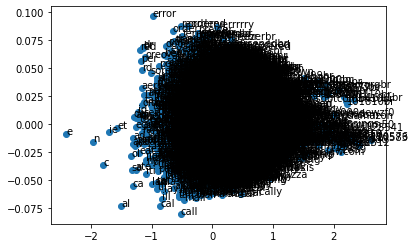

In [ ]:
#create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
fstext_words = list(fstext.wv.vocab)
for i, fstext_word in enumerate(fstext_words):
    pyplot.annotate(fstext_word, xy=(result[i, 0], result[i, 1]))

pyplot.show()

In [ ]:
dataset = reviews_sample.copy()
dataset = dataset [['Score','Text']]

def temp_catogorize(row):
  if row <= 3:
    return 0
  else:
    return 1

dataset ['Score'] = dataset['Score'].apply(temp_catogorize)
dataset

,Score,Text
0,0,excited hear bringing sweet strawberry flavore...
1,0,hoping natural tasting snack chose buy thisbr ...
2,0,class action law firm gallo associates investi...
3,0,ok like ritz crackers liked idea less salt how...
4,0,yorkie almost died eaten organic food entire l...
...,...,...
148710,1,chips great deal kettle special deal case chip...
148711,1,love popcorn brand terrific like red get big t...
148712,1,saw item brought back memories childhood visit...
148713,1,ive looking highquality caffeine free tea woul...


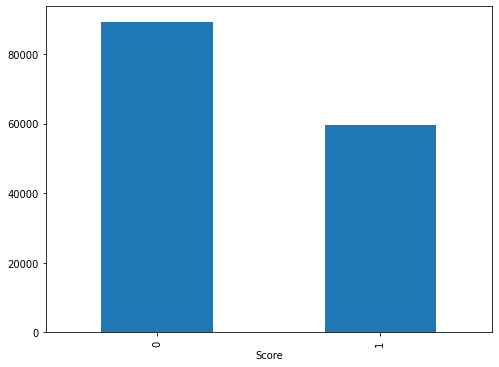

In [ ]:
dataset.groupby('Score').Text.count()

fig = plt.figure(figsize=(8,6))
dataset.groupby('Score').Text.count().plot.bar(ylim=0)
plt.show()

In [ ]:
#feature engineering and model training

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(dataset['Text'], dataset['Score'])
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)





In [ ]:
tfidf_vector = TfidfVectorizer (analyzer='word', max_features = 200000)

tfidf_vector.fit(dataset['Text'])
train_x = tfidf_vector.transform(train_x)
valid_x = tfidf_vector.transform(valid_x)

In [ ]:
model = linear_model.LogisticRegression(verbose=True, max_iter=600).fit(train_x, train_y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   10.9s finished


In [ ]:
accuracy = metrics.accuracy_score(model.predict(valid_x), valid_y)
print("accuracy : ", accuracy)

print("root mean squared error :", metrics.mean_squared_error(valid_y, model.predict(valid_x)))

print(metrics.classification_report(valid_y, model.predict(valid_x)))

accuracy :  0.844455203206111
root mean squared error : 0.15554479679388902
              precision    recall  f1-score   support

           0       0.85      0.90      0.87     22371
           1       0.83      0.76      0.80     14808

    accuracy                           0.84     37179
   macro avg       0.84      0.83      0.84     37179
weighted avg       0.84      0.84      0.84     37179

